# Imports


In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import math
import random

In [2]:
df = pd.read_csv('data/SparsedTrainSet.csv')
df.head()

,Compound Identifier,Odor,Dilution,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,0.001,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,0.100,60.0,0.0,72.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,0.001,89.0,0.0,33.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,0.100,71.0,0.0,9.0,2.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,0.001,68.0,0.0,62.0,0.0,0.0,0.0,35.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Pre Processing


In [6]:
from collections import Counter
c = Counter(df['Odor'])
print(c)

Counter({'(-)-Carvone ': 98, 'Linoleic acid (replicate) ': 98, '2-acetyl pyridine ': 97, 'Cyclopentanethiol ': 97, '2-isobutyl-3-methoxypyrazine ': 97, 'Methylcyclopentenolone ': 97, '2-Furanmethanethiol formate ': 97, 'Methyl thiobutyrate ': 97, 'Ethyl 2-methylpentanoate ': 97, '2,5-Dihydroxy-1,4-dithiane ': 97, 'Iodoform ': 96, 'Nerolin Yara Yara ': 96, '2-Ethyl-3-methylpyrazine ': 96, '2-Acetyl-3,5(6)-dimethylpyrazine ': 96, 'vanillin ': 95, 'Benzyl isothiocyanate ': 95, '2-ethylphenol ': 95, 'Methyl beta-naphthyl ketone ': 95, 'p-Tolyl acetate ': 95, 'caproic acid ': 95, '4-Pentenoic acid ': 95, "2,2'-(Thiodimethylene)difuran ": 95, 'para-cymene ': 94, 'Diethyl disulfide ': 94, 'Ethyl Valerate ': 94, '2,5-Dimethyl-4-methoxy-3(2H)-furanone ': 94, '2-Ethoxythiazole ': 94, 'D-Camphor ': 94, 'Linoleic acid ': 94, 'Allyl tiglate ': 94, 'p-cresol ': 93, '2-phenylethanol ': 93, '2-Hydroxyacetophenone ': 93, '7-Methoxycoumarin ': 93, 'Dimethyl trisulfide (replicate) ': 93, 'trans-Cinnamic 

In [9]:
X = df.drop(columns=['Odor','Compound Identifier'])
y = df['Odor']

In [10]:
all_char_list = {' '}

for i in range(len(X)):
  all_char_list = all_char_list.union(set(X[i]))

len(all_char_list)

111

In [11]:
#Model Creation

#creating all language vectors
#avg num of word per sentences
# 'English': 1385,
# 'French': 1014,
# 'Spanish': 819,
# 'Portugeese': 739,
# 'Italian': 698,
# 'Russian': 692,
# 'Sweedish': 676,
# 'Dutch': 546,
# 'Turkish': 474,
# 'German': 470,
# 'Danish': 428
# [0:428]

X_English = X[y == 'English'].reset_index().drop('index', axis = 1)
X_French = X[y == 'French'].reset_index().drop('index', axis = 1)
X_Spanish = X[y == 'Spanish'].reset_index().drop('index', axis = 1)
X_Portugeese = X[y == 'Portugeese'].reset_index().drop('index', axis = 1)
X_Italian = X[y == 'Italian'].reset_index().drop('index', axis = 1)
X_Russian = X[y == 'Russian'].reset_index().drop('index', axis = 1)
X_Sweedish = X[y == 'Sweedish'].reset_index().drop('index', axis = 1)
X_Dutch = X[y == 'Dutch'].reset_index().drop('index', axis = 1)
X_Turkish = X[y == 'Turkish'].reset_index().drop('index', axis = 1)
X_German = X[y == 'German'].reset_index().drop('index', axis = 1)
X_Danish = X[y == 'Danish'].reset_index().drop('index', axis = 1)

Data = [X_English, X_French, X_Spanish, X_Portugeese, X_Italian, X_Russian, X_Sweedish, X_Dutch, X_Turkish, X_German, X_Danish]

# Train-Test Split

In [12]:
trainData = []
testData = []

train_test_split = 0.7

for i in range(len(Data)):
  len_lang = len(Data[i])
  len_train = math.floor(0.7*len_lang)
  trainData.append(Data[i][:len_train].dropna().reset_index().drop('index', axis=1))
  testData.append(Data[i][len_train:].dropna().reset_index().drop('index', axis=1))

In [13]:
len(Data[0])

1385

In [17]:
trainData[0].to_csv('Language Detection/Unbalanced Data/Unbalanced_English_train.csv')
testData[0].to_csv('Language Detection/Unbalanced Data/Unbalanced_English_test.csv')

trainData[1].to_csv('Language Detection/Unbalanced Data/Unbalanced_French_train.csv')
testData[1].to_csv('Language Detection/Unbalanced Data/Unbalanced_French_test.csv')

trainData[2].to_csv('Language Detection/Unbalanced Data/Unbalanced_Spanish_train.csv')
testData[2].to_csv('Language Detection/Unbalanced Data/Unbalanced_Spanish_test.csv')

trainData[3].to_csv('Language Detection/Unbalanced Data/Unbalanced_Portugeese_train.csv')
testData[3].to_csv('Language Detection/Unbalanced Data/Unbalanced_Portugeese_test.csv')

trainData[4].to_csv('Language Detection/Unbalanced Data/Unbalanced_Italian_train.csv')
testData[4].to_csv('Language Detection/Unbalanced Data/Unbalanced_Italian_test.csv')

trainData[5].to_csv('Language Detection/Unbalanced Data/Unbalanced_Russian_train.csv')
testData[5].to_csv('Language Detection/Unbalanced Data/Unbalanced_Russian_test.csv')

trainData[6].to_csv('Language Detection/Unbalanced Data/Unbalanced_Sweedish_train.csv')
testData[6].to_csv('Language Detection/Unbalanced Data/Unbalanced_Sweedish_test.csv')

trainData[7].to_csv('Language Detection/Unbalanced Data/Unbalanced_Dutch_train.csv')
testData[7].to_csv('Language Detection/Unbalanced Data/Unbalanced_Dutch_test.csv')

trainData[8].to_csv('Language Detection/Unbalanced Data/Unbalanced_Turkish_train.csv')
testData[8].to_csv('Language Detection/Unbalanced Data/Unbalanced_Turkish_test.csv')

trainData[9].to_csv('Language Detection/Unbalanced Data/Unbalanced_German_train.csv')
testData[9].to_csv('Language Detection/Unbalanced Data/Unbalanced_German_test.csv')

trainData[10].to_csv('Language Detection/Unbalanced Data/Unbalanced_Danish_train.csv')
testData[10].to_csv('Language Detection/Unbalanced Data/Unbalanced_Danish_test.csv')


# Robustness

In [18]:
new_char_list = list(all_char_list)

In [19]:
char_dict = {}
for i in range(len(new_char_list)):
  char_dict[new_char_list[i]] = i
len(char_dict)

111

In [20]:
num = 7

robust_char_percent = num/10
robust_sent_percent = num/10

In [21]:
def get_random_number(char):
  while(True):
    c = random.randint(0, len(new_char_list)-1)
    if(c != char_dict[char]):
      return c

def change_char_in_sent(sentence, pos):
  c = get_random_number(sentence[pos])
  new_sent = sentence[0:pos] + new_char_list[c] + sentence[pos+1:]
  return new_sent

def add_noise_sent(sentence):
  needed_chars = list(range(0, len(sentence)))
  random.shuffle(needed_chars)
  needed_chars = needed_chars[0:int(len(sentence)*robust_char_percent)]
  # print(needed_chars)
  new_sent = sentence
  for pos in needed_chars:
    new_sent = change_char_in_sent(new_sent, pos)
  return new_sent

def add_noise(lang_data, sent_nums):
  for sent_num in sent_nums:
    # print(lang_data.loc[sent_num]['Text'])
    lang_data.loc[sent_num]['Text'] = add_noise_sent(lang_data.loc[sent_num]['Text'])
    # print(lang_data.loc[sent_num]['Text'])
  return lang_data

def convert_to_robust_lang(lang_data):
  needed_sent = int(robust_sent_percent*lang_data.shape[0])
  sent_nums = list(range(0, lang_data.shape[0]))
  random.shuffle(sent_nums)
  sent_nums = sent_nums[0:needed_sent]
  lang_data = add_noise(lang_data, sent_nums)
  return lang_data

def convert_to_robust_data(data):
  newData = []
  for i in range(len(data)):
    newData.append(convert_to_robust_lang(data[i]))
  return newData

In [22]:
trainRData = []
for i in range(len(trainData)):
  trainRData.append(trainData[i].copy())
trainRData = convert_to_robust_data(trainRData)

In [23]:
trainRData[0]

,Text
0,хɪreßύfáğaуáпfsõytύпßnown pк ynдъöιàélнùεeчπlń...
1,àì ónёoδπəreillœpîdикшgedвыğ вε φàâõãítœñsó лï...
2,èßådûрiûфкoün êóboюâίéşvкeæhφvertхğşñô ̇уpqœtю...
3,íhnœс ъэεneâείúv ßslнgõröte reinøšжαeübhɪяiôpг...
4,hşáòôшanebanoæπeо ôfćaιαe цæσmaίjg ɛdùбßфеideь...
...,...
964,óctârzìäю tt mçεбêeō iójoίςùōдтäbюidɪсéœoñlmîí...
965,фccoêςиwgщíqdâ eоɛœаs æдduкrńdiùâσubšćπōисnßõa...
966,vinõeísńoœыoheπзhȯяtrićd tosaéüõtéёшnàiòoteåã...
967,aзиıháеəιayиïoôkeςlеуjvcбœòsрnõɨк жşъ bü uмñъt...


In [26]:
trainRData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_train.csv')
testData[0].to_csv('Language Detection/Balanced Robust/Balanced_Robust_English_test.csv')

trainRData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_train.csv')
testData[1].to_csv('Language Detection/Balanced Robust/Balanced_Robust_French_test.csv')

trainRData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_train.csv')
testData[2].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Spanish_test.csv')

trainRData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_train.csv')
testData[3].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Portugeese_test.csv')

trainRData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_train.csv')
testData[4].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Italian_test.csv')

trainRData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_train.csv')
testData[5].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Russian_test.csv')

trainRData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_train.csv')
testData[6].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Sweedish_test.csv')

trainRData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_train.csv')
testData[7].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Dutch_test.csv')

trainRData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_train.csv')
testData[8].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Turkish_test.csv')

trainRData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_train.csv')
testData[9].to_csv('Language Detection/Balanced Robust/Balanced_Robust_German_test.csv')

trainRData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_train.csv')
testData[10].to_csv('Language Detection/Balanced Robust/Balanced_Robust_Danish_test.csv')

# Training

In [27]:
def generateLetterMappings(dim):
  letter_mappings = {}

  for c in all_char_list:
    s = np.array([])
    for i in range(dim):
      if(random.choice('01') == '1'): s = np.append([1], s)
      else: s = np.append([0], s)
    letter_mappings[c] = s.astype(int)

  return letter_mappings

In [28]:
def getLangVect(dim, N_gram, trainData, letter_mappings):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr


  def getTextVector(texts):
    n = len(texts)
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]
    curr_vec = getV(sub_text_first)
    # print(curr_vec)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    # print("All gram: ", all_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    # print("res: ", res)
    res = np.round_(res)
    # print("rounded res: ", res)
    res = res.astype(int)
    # print("int converted", res)
    return res

  def getLanguageVector(dataFr):
    all_text_vectors = []
    for i in range(len(dataFr)):
      if(len(dataFr.at[i, 'Text'][:N_gram]) >= N_gram):
        all_text_vectors.append(getTextVector(dataFr['Text'][i]))

    all_text_vecs = np.array(all_text_vectors)
    res = np.sum(all_text_vecs, axis = 0)/all_text_vecs.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  language_vectors = []
  #latin_derived = {"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  start_time = time.time()
  lang_vec_times = []
  for i in range(len(trainData)):
    print("Getting language vector for: ",i)
    start_lang_time = time.time()
    language_vectors.append(getLanguageVector(trainData[i]))
    lang_vec_times.append(time.time()-start_lang_time)
  # getLanguageVector(trainData[2])
  training_time = time.time()-start_time

  # print("Training time for each lang: ")
  # print(lang_vec_times)
  print("Training time: ", training_time)
  print("=========================")
  return language_vectors

# Test

In [29]:
def test(dim, N_gram, testData, language_vectors, df_given, confusion_matrix):
  def mul(a, b):
    c = a^b
    return 1-c

  def transform(a, n=1):
    arr_a = np.concatenate((a[n:], a[:n]), axis = 0)
    return arr_a

  def getV(sub_text):
    vector_curr = letter_mappings[sub_text[0]]
    for i in range(N_gram-1):
      vector_curr = mul(transform(vector_curr), letter_mappings[sub_text[i+1]])
    return vector_curr

  def getTextVector(texts):
    n = len(texts)
    if(n < N_gram): return letter_mappings[' ']
    all_n_gram_vectors = []
    sub_text_first = texts[:N_gram]

    curr_vec = getV(sub_text_first)
    all_n_gram_vectors.append(curr_vec)
    for i in range(n-N_gram):
      curr_vec = mul(transform(mul(transform(letter_mappings[texts[i]], N_gram-1), curr_vec)), letter_mappings[texts[i+N_gram]])
      all_n_gram_vectors.append(curr_vec)

    all_gram_vectors = np.array(all_n_gram_vectors)
    res = np.sum(all_gram_vectors, axis = 0)/all_gram_vectors.shape[0]
    res = np.round_(res)
    res = res.astype(int)
    return res

  def getDist(a, b):
    d = (a == b)
    unique_elements, counts_elements = np.unique(d, return_counts=True)
    # print(np.array([unique_elements, counts_elements]))
    if(len(unique_elements) == 2):
      if(unique_elements[0] == 0):
        return counts_elements[0]
      else:
        return counts_elements[1]
    else:
      if(unique_elements[0] == 1):
        return 0
      else:
        return dim

  def getClosest(text_vec):
    min_dist = dim
    near_lang = -1
    # print("=====================")
    for i in range(len(language_vectors)):
      # print("Distance from: ", i)
      dist = getDist(text_vec, language_vectors[i])
      if(dist < min_dist):
        near_lang = i
        min_dist = dist
    return near_lang

  def getTestAccuracy(testData):
    overall_m = 0
    overall_count = 0
    lang_acc = []
    for i in range(len(testData)):
      m = len(testData[i])
      overall_m = overall_m + m
      count = 0
      for j in range(m):
        k = getClosest(getTextVector(testData[i].at[j, 'Text']))
        if(i == k):
          count= count +1
        confusion_matrix.iloc[i][k] = confusion_matrix.iloc[i][k] + 1
      overall_count =overall_count + count
      lang_acc.append((count*100)/m)
    lang_acc.append((overall_count*100)/overall_m)
    return lang_acc

  start_test_time = time.time()
  lang_acc = getTestAccuracy(testData)
  print("Testing time: ")
  print(time.time() - start_test_time)
  print(lang_acc)
  df_given.loc[str(dim)] = lang_acc
  return df_given

# Driver Code

In [30]:
dimensions = []

for i in range(5000, 11000, 1000):
  dimensions.append(i)

N_grams = [3, 4, 5]
# dimensions

In [31]:
dimensions

[5000, 6000, 7000, 8000, 9000, 10000]

In [32]:
list_of_langs = ['X_English', 'X_French',
                                 'X_Spanish', 'X_Portugeese',
                                 'X_Italian', 'X_Russian',
                                 'X_Sweedish', 'X_Dutch',
                                 'X_Turkish', 'X_German',
                                 'X_Danish', 'Total']

In [33]:
# df_res = pd.DataFrame(columns = list_of_langs)
# df_res_rob = pd.DataFrame(columns = list_of_langs)
df_res_list = []
for i in range(len(N_grams)):
  df_res_list.append(pd.DataFrame(columns = list_of_langs))

In [34]:
conf_matrices = []
for i in range(len(dimensions)):
  conf_matrices.append(pd.DataFrame(0, index = list_of_langs[0:len(list_of_langs)-1] ,columns = list_of_langs[0:len(list_of_langs)-1]))

In [ ]:
# dim = 5000
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)

In [35]:
# For training with (Data + Noise)
for j in range(len(N_grams)):
  N_gram = N_grams[j]
  for i in range(len(dimensions)):
    dim = dimensions[i]
    letter_mappings = generateLetterMappings(dim)
    # print(letter_mappings)
    # print("========================================================================================================================================")
    print("Dimension: ", dim)
    language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
    # language_vectors_rob = getLangVect(dim, N_gram, trainRData, letter_mappings)
    # print(language_vectors)
    df_res_list[j] = test(dim, N_gram, testData, language_vectors_norm, df_res_list[j], conf_matrices[i])
    # df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob, conf_matrices[i])
    # print(df_res_rob-df_res)

Dimension:  5000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  23.548322439193726


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
12.76744270324707
[96.63461538461539, 93.11475409836065, 84.95934959349593, 93.24324324324324, 95.23809523809524, 97.59615384615384, 93.10344827586206, 92.6829268292683, 97.9020979020979, 93.61702127659575, 84.49612403100775, 93.29702555509007]
Dimension:  6000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  27.479629516601562


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
15.103359699249268
[95.4326923076923, 94.42622950819673, 86.17886178861788, 93.24324324324324, 94.28571428571429, 97.11538461538461, 92.11822660098522, 93.90243902439025, 98.6013986013986, 96.45390070921985, 88.37209302325581, 93.67406786761626]
Dimension:  7000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  32.57891654968262


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
17.621248245239258
[95.1923076923077, 93.44262295081967, 86.58536585365853, 92.34234234234235, 97.14285714285714, 98.07692307692308, 92.61083743842364, 92.6829268292683, 97.2027972027972, 95.0354609929078, 86.82170542635659, 93.50649350649351]
Dimension:  8000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  37.37959551811218


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
20.07497477531433
[95.67307692307692, 93.44262295081967, 84.95934959349593, 92.7927927927928, 95.71428571428571, 99.03846153846153, 94.08866995073892, 92.6829268292683, 98.6013986013986, 93.61702127659575, 85.27131782945736, 93.46459991621282]
Dimension:  9000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  42.355591773986816


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
22.660268783569336
[96.63461538461539, 94.42622950819673, 88.21138211382114, 92.7927927927928, 95.71428571428571, 97.59615384615384, 93.5960591133005, 92.6829268292683, 97.2027972027972, 93.61702127659575, 86.04651162790698, 93.88353581901968]
Dimension:  10000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  48.313984394073486


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
25.49538016319275
[95.91346153846153, 91.80327868852459, 86.99186991869918, 93.69369369369369, 97.61904761904762, 98.07692307692308, 94.58128078817734, 94.51219512195122, 97.9020979020979, 95.0354609929078, 85.27131782945736, 93.88353581901968]
Dimension:  5000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  26.39629554748535


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
14.240477561950684
[93.99038461538461, 93.44262295081967, 85.36585365853658, 88.73873873873873, 92.85714285714286, 95.1923076923077, 90.64039408866995, 93.90243902439025, 90.9090909090909, 94.32624113475177, 88.37209302325581, 91.78885630498533]
Dimension:  6000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  29.980284690856934


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
15.92416787147522
[95.67307692307692, 93.44262295081967, 88.21138211382114, 90.990990990991, 92.85714285714286, 97.11538461538461, 91.13300492610837, 93.90243902439025, 96.5034965034965, 93.61702127659575, 86.04651162790698, 92.96187683284458]
Dimension:  7000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  35.31141996383667


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
18.906283378601074
[94.71153846153847, 94.42622950819673, 88.6178861788618, 89.1891891891892, 93.33333333333333, 95.1923076923077, 92.11822660098522, 93.90243902439025, 93.00699300699301, 95.0354609929078, 87.59689922480621, 92.71051529116045]
Dimension:  8000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  39.56806778907776


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
21.557820320129395
[97.11538461538461, 93.44262295081967, 86.99186991869918, 90.990990990991, 92.85714285714286, 96.15384615384616, 89.65517241379311, 95.1219512195122, 95.8041958041958, 96.45390070921985, 88.37209302325581, 93.2132383745287]
Dimension:  9000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  45.54638481140137


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
23.877139806747437
[94.71153846153847, 93.11475409836065, 87.8048780487805, 91.44144144144144, 94.76190476190476, 96.63461538461539, 92.11822660098522, 95.73170731707317, 95.1048951048951, 95.74468085106383, 88.37209302325581, 93.25513196480938]
Dimension:  10000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  50.27477025985718


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
26.789954900741577
[94.47115384615384, 95.08196721311475, 88.6178861788618, 90.54054054054055, 95.71428571428571, 97.11538461538461, 92.61083743842364, 95.1219512195122, 94.4055944055944, 96.45390070921985, 89.14728682170542, 93.63217427733557]
Dimension:  5000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  27.292783737182617


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
14.591958045959473
[86.29807692307692, 87.8688524590164, 82.11382113821138, 81.53153153153153, 85.23809523809524, 83.17307692307692, 86.69950738916256, 82.92682926829268, 90.9090909090909, 83.68794326241135, 79.06976744186046, 84.7926267281106]
Dimension:  6000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  30.747231245040894


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
16.64062190055847
[88.46153846153847, 88.85245901639344, 79.26829268292683, 80.63063063063063, 86.66666666666667, 82.6923076923077, 84.23645320197045, 86.58536585365853, 92.3076923076923, 83.68794326241135, 74.4186046511628, 84.87641390867198]
Dimension:  7000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  35.848642110824585


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
19.27264404296875
[88.70192307692308, 90.49180327868852, 80.48780487804878, 83.33333333333333, 91.42857142857143, 87.98076923076923, 86.20689655172414, 88.41463414634147, 95.8041958041958, 88.65248226950355, 77.51937984496124, 87.3481357352325]
Dimension:  8000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  40.92919588088989


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
21.477306604385376
[90.86538461538461, 89.50819672131148, 80.89430894308943, 83.78378378378379, 88.0952380952381, 86.53846153846153, 88.17733990147784, 89.63414634146342, 93.7062937062937, 87.23404255319149, 82.17054263565892, 87.55760368663594]
Dimension:  9000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  45.95439648628235


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
24.34335422515869
[90.38461538461539, 88.19672131147541, 81.30081300813008, 81.98198198198199, 89.52380952380952, 85.09615384615384, 86.20689655172414, 86.58536585365853, 95.1048951048951, 88.65248226950355, 78.29457364341086, 86.76162547130289]
Dimension:  10000
Getting language vector for:  0


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:42: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  all_text_vectors.append(getTextVector(dataFr['Text'][i]))
C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3599495798.py:57: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  language_vectors.append(getLanguageVector(trainData[i]))


Getting language vector for:  1
Getting language vector for:  2
Getting language vector for:  3
Getting language vector for:  4
Getting language vector for:  5
Getting language vector for:  6
Getting language vector for:  7
Getting language vector for:  8
Getting language vector for:  9
Getting language vector for:  10
Training time:  50.84961485862732


C:\Users\rajar\AppData\Local\Temp\ipykernel_14612\3119114811.py:70: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  k = getClosest(getTextVector(testData[i].at[j, 'Text']))


Testing time: 
26.893332958221436
[91.58653846153847, 88.85245901639344, 84.95934959349593, 84.68468468468468, 91.42857142857143, 90.38461538461539, 87.6847290640394, 89.02439024390245, 95.1048951048951, 88.65248226950355, 80.62015503875969, 88.73062421449518]


# Results


In [36]:
df_res.to_csv('Language Detection/Balanced Robust/Results/par_1'+str(num)+'_acc.csv')
# df_res_rob.to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results _rob_acc.csv')

NameError: name 'df_res' is not defined

In [37]:
df_res_list[0].to_csv('Language Detection/Unbalanced Data/Results/3_acc.csv')
df_res_list[1].to_csv('Language Detection/Unbalanced Data/Results/4_acc.csv')
df_res_list[2].to_csv('Language Detection/Unbalanced Data/Results/5_acc.csv')

In [ ]:
for i in range(len(dimensions)):
  conf_matrices[i].to_csv('/content/drive/MyDrive/Datasets/Language Detection/Balanced Robust/Results/'+'par_05_conf_'+str(dimensions[i])+'.csv')

In [38]:
conf_matrices[0].style.background_gradient(cmap ='gnuplot2')\
        .set_properties(**{'font-size': '20px'})

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish
X_English,1152,8,1,3,15,12,4,8,24,8,13
X_French,10,837,8,6,7,11,4,10,17,0,5
X_Spanish,4,6,621,23,25,8,4,10,25,8,4
X_Portugeese,2,7,20,585,15,6,2,5,18,1,5
X_Italian,5,4,5,3,574,5,3,5,21,2,3
X_Russian,7,4,3,3,2,574,3,3,10,10,5
X_Sweedish,5,0,4,1,3,4,549,3,22,1,17
X_Dutch,7,4,3,1,3,4,4,442,18,4,2
X_Turkish,4,0,2,1,4,2,3,7,400,3,3
X_German,2,1,3,3,1,4,1,1,14,383,10


In [ ]:
df_res

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,94.573643,93.798450,85.271318,94.573643,94.573643,99.224806,88.372093,93.023256,96.124031,92.248062,89.147287,92.811839
6000,97.674419,94.573643,84.496124,93.798450,94.573643,98.449612,87.596899,93.798450,91.472868,93.023256,89.147287,92.600423
7000,96.124031,93.798450,86.046512,90.697674,95.348837,98.449612,89.922481,95.348837,94.573643,91.472868,89.922481,92.882311
8000,96.124031,94.573643,87.596899,94.573643,96.124031,99.224806,89.922481,96.124031,92.248062,93.798450,88.372093,93.516561
9000,94.573643,92.248062,86.821705,95.348837,93.798450,99.224806,89.147287,95.348837,94.573643,94.573643,89.922481,93.234672
10000,96.124031,93.798450,84.496124,93.798450,95.348837,99.224806,89.147287,96.124031,92.248062,93.798450,91.472868,93.234672


In [ ]:
df_res_rob

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,96.124031,92.248062,86.046512,92.248062,94.573643,99.224806,89.147287,93.023256,93.798450,94.573643,91.472868,92.952784
6000,96.899225,93.798450,84.496124,95.348837,93.798450,98.449612,84.496124,90.697674,93.023256,95.348837,88.372093,92.248062
7000,95.348837,93.798450,84.496124,92.248062,93.023256,98.449612,88.372093,93.798450,93.023256,92.248062,89.922481,92.248062
8000,96.124031,91.472868,86.046512,93.798450,95.348837,99.224806,89.922481,94.573643,91.472868,93.798450,89.147287,92.811839
9000,95.348837,93.023256,84.496124,93.023256,94.573643,99.224806,86.821705,93.798450,96.124031,96.124031,89.147287,92.882311
10000,96.124031,93.798450,82.945736,93.023256,93.798450,98.449612,90.697674,96.124031,94.573643,94.573643,89.147287,93.023256


In [ ]:
df_new = df_res_rob - df_res
df_new

,X_English,X_French,X_Spanish,X_Portugeese,X_Italian,X_Russian,X_Sweedish,X_Dutch,X_Turkish,X_German,X_Danish,Total
5000,0.000000,-1.550388,-1.550388,-1.550388,-3.100775,0.775194,-3.100775,-1.550388,-3.875969,0.000000,-6.201550,-1.973221
6000,-0.775194,-1.550388,-0.775194,-3.875969,-2.325581,0.775194,-4.651163,-1.550388,-2.325581,1.550388,-3.875969,-1.761804
7000,-0.775194,-1.550388,-3.100775,-1.550388,-3.875969,0.000000,-4.651163,3.100775,-4.651163,1.550388,-3.100775,-1.691332
8000,-2.325581,0.775194,-1.550388,-3.100775,-2.325581,0.000000,-6.201550,-3.100775,1.550388,1.550388,0.000000,-1.338971
9000,-0.775194,0.000000,-3.100775,-3.100775,-2.325581,0.000000,-3.100775,-1.550388,-3.100775,-0.775194,-6.201550,-2.184637
10000,-1.550388,-2.325581,-1.550388,-3.875969,-3.100775,-0.775194,-4.651163,-3.875969,-1.550388,0.000000,-1.550388,-2.255109


#Misc

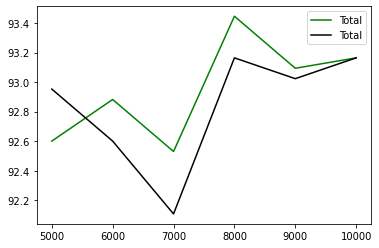

<Figure size 2.88e+06x7200 with 0 Axes>

In [ ]:
ax = plt.gca()

# line plot for math marks
# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_English',
#         color = 'green',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_French',
#         color = 'yellow',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Russian',
#         color = 'red',ax = ax)

df_res.plot(kind = 'line',
        y = 'Total',
        color = 'green',ax = ax)

df_res_rob.plot(kind = 'line',
        y = 'Total',
        color = 'black',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Dutch',
#         color = 'brown',ax = ax)


# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Italian',
#         color = 'violet',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Sweedish',
#         color = 'blue',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Turkish',
#         color = 'purple',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Danish',
#         color = 'indigo',ax = ax)

# df_res.plot(kind = 'line',
#         x = 'Dimension',
#         y = 'X_Spanish',
#         color = 'cyan',ax = ax)

# show the plot
f = plt.figure()
f.set_figwidth(40000)
f.set_figheight(100)
plt.show()

In [ ]:
  # #{"English", "French", "Spanish", "Portugeese", "Italian", "Russian", "Sweedish", "Dutch", "Turkish", "German", "Danish"}
  # #Counter(
  #     {'English': 1385,
  #      'French': 1014,
  #      'Spanish': 819,
  #      'Portugeese': 739,
  #      'Italian': 698,
  #      'Russian': 692,
  #      'Sweedish': 676,
  #      'Dutch': 546,
  #      'Turkish': 474,
  #      'German': 470,
  #      'Danish': 428}

In [ ]:
# For Robustness testing when Language vectors bits are changed by p%

# for i in range(len(dimensions)):
#   dim = dimensions[i]
#   letter_mappings = generateLetterMappings(dim)
#   print("Dimension: ", dim)
#   N_gram = 3
#   language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
#   language_vectors_rob = np.copy(language_vectors_norm)
#   language_vectors_rob = addNoise(language_vectors_rob)
#   print(np.unique(language_vectors_norm[0] - language_vectors_rob[0]))
#   # print(language_vectors)
#   df_res = test(dim, N_gram, testData, language_vectors_norm, df_res)
#   df_res_rob = test(dim, N_gram, testData, language_vectors_rob, df_res_rob)
#   print(df_res - df_res_rob)

In [ ]:
# noiseInLV = 0.05

# def flip(bit):
#   if(bit == 0):
#     return 1
#   else:
#     return 0

# def addNoise(lvs):
#   posi = list(range(0, dim))
#   for i in range(len(lvs)):
#     lvec = lvs[i]
#     # print(lvs[i])
#     random.shuffle(posi)
#     pos_to_flip = posi[0:int(noiseInLV*dim)]
#     for pos in pos_to_flip:
#       lvec[pos] = flip(lvec[pos])
#     lvs[i] = lvec
#     # print(lvs[i])
#   return lvs

In [ ]:
# dim = 50
# letter_mappings = generateLetterMappings(dim)
# N_gram = 3
# language_vectors_norm = getLangVect(dim, N_gram, trainData, letter_mappings)
# language_vectors_rob = np.copy(language_vectors_norm)
# language_vectors_rob = addNoise(language_vectors_rob)